# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint #importing pprint
import requests as req

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [39]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [40]:
# Using Openweather API to get the weather data needed from those cities.
# Save config information (from lesson 06/2/ activity 07 - weather stats)

# Create base URL and indicate metric units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


#Build partial query URL
query = f"{url}appid={api_key}&units={units}&q="


# preparing empty variables
city_name =[]
temp = []
hum = []
cloud = []
wind = []
lat = []
long = []



for a0 in range(len(cities)):
    response = requests.get(f"{query}{cities[a0]}").json()
# there's no data for some of the cities in openweathermap, adding exception handle for this
    try:
        city_name.append(response['name'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])   
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        
    except KeyError:
        city_name.append(np.nan)
        temp.append(np.nan)
        hum.append(np.nan)
        cloud.append(np.nan)
        wind.append(np.nan)
        lat.append(np.nan)
        long.append(np.nan)
    
# set clouds and wind to zero when its not cloudy it
    try:
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except KeyError:
        cloud.append(0)
        wind.append(0)
        
    print("--------------------------------------------")
    print("Beggining Data Retrival")
    print("--------------------------------------------") 
    # Print city name and query string    
    print(f"Processing record {a0 + 1} | {cities[a0]}")
    print(f"{query}{cities[a0]}")
    

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 1 | harindanga
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=harindanga
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 2 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=punta arenas
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 3 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=bethel
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 4 | sambhar
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a0

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 34 | bani
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=bani
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 35 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=butaritari
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 36 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=sinnamary
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 37 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 66 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=kavieng
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 67 | seymchan
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=seymchan
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 68 | brae
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=brae
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 69 | buchanan
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&unit

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 98 | mnogovershinnyy
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=mnogovershinnyy
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 99 | reinheim
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=reinheim
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 100 | angouleme
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=angouleme
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 101 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=43494

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 130 | hit
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=hit
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 131 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=pacific grove
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 132 | paracuru
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=paracuru
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 133 | sitka
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a071

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 162 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=geraldton
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 163 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=saint-philippe
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 164 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=pevek
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 165 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 194 | nueva loja
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=nueva loja
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 195 | sibolga
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=sibolga
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 196 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=husavik
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 197 | joigny
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 227 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=tiksi
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 228 | carlos antonio lopez
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=carlos antonio lopez
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 229 | urubicha
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=urubicha
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 230 | timbiras
http://api.openweathermap.org/data/2.5/weather?appid=43494

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 260 | yumen
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=yumen
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 261 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=amderma
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 262 | vilcun
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=vilcun
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 263 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&uni

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 292 | porvoo
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=porvoo
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 293 | chota
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=chota
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 294 | el alto
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=el alto
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 295 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&unit

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 324 | beloha
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=beloha
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 325 | villa carlos paz
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=villa carlos paz
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 326 | daura
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=daura
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 327 | mehran
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 356 | manokwari
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=manokwari
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 357 | namatanai
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=namatanai
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 358 | tumannyy
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=tumannyy
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 359 | tongzi
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f47

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 388 | rajgir
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=rajgir
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 389 | koshurnikovo
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=koshurnikovo
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 390 | terrace
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=terrace
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 391 | atar
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 420 | senges
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=senges
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 421 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=rocha
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 422 | fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=fort-shevchenko
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 423 | jennings
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 453 | hostotipaquillo
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=hostotipaquillo
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 454 | san joaquin
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=san joaquin
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 455 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=pangnirtung
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 456 | srednekolymsk
http://api.openweathermap.org/data/2.5/weathe

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 486 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=grand gaube
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 487 | ambovombe
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=ambovombe
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 488 | mumford
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=mumford
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 489 | meadow lake
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c77

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 518 | chara
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=chara
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 519 | satna
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=satna
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 520 | college
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=college
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 521 | columbia
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&unit

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 550 | forestville
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=forestville
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 551 | sorvag
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=sorvag
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 552 | shugurovo
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=shugurovo
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 553 | barcelos
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f

--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 582 | san jose
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=san jose
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 583 | parakai
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=parakai
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 584 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb3f473a07103c0c2&units=imperial&q=san patricio
--------------------------------------------
Beggining Data Retrival
--------------------------------------------
Processing record 585 | kamaishi
http://api.openweathermap.org/data/2.5/weather?appid=434945edbf6c773bb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
#limiting to 500
weather_df = pd.DataFrame({"City": city_name[0:500],
                           "Latitude": lat[0:500],
                           "Longitude": long[0:500],
                           "Humidity": hum[0:500],
                           "Temperature": temp[0:500],
                           "Cloudiness": cloud[0:500],
                           "Wind Speed": wind[0:500]
                          })

weather_df = weather_df.dropna(how='any')

#Save dataframe as csv
pd.DataFrame.to_csv(weather_df, 'weather_data.csv')

weather_df.head()

,City,Latitude,Longitude,Humidity,Temperature,Cloudiness,Wind Speed
0,Harindanga,22.04,88.32,84.0,87.80,75.0,4.70
1,Punta Arenas,-53.16,-70.91,87.0,42.80,75.0,4.70
2,Bethel,60.79,-161.76,69.0,39.20,75.0,6.93
3,Sambhar,26.91,75.18,58.0,86.00,75.0,6.93
4,Concepcion,9.56,-73.66,97.0,73.89,1.0,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

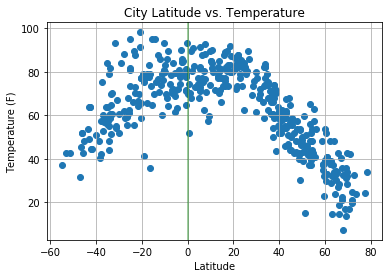

In [43]:
#Plot latitude vs temperature
plt.scatter(weather_df['Latitude'], weather_df['Temperature'])
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.axvline(x=0,c="g",alpha=0.5)


#save as .png
plt.savefig('lattitude_vs_temp.png', bbox_inches='tight')

#### Latitude vs. Humidity Plot

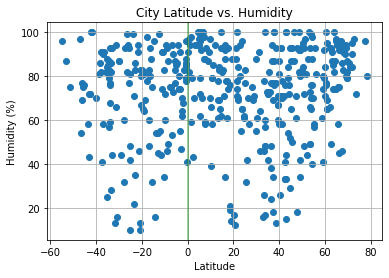

In [44]:
#Plot latitude vs humidity
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.axvline(x=0,c="g",alpha=0.5)


#save as png
plt.savefig('lat_humid.png', bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

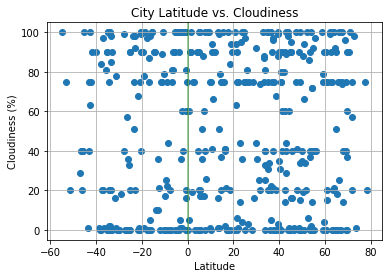

In [45]:
#Plot latitude vs cloudiness and save as .png
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'])
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.axvline(x=0,c="g",alpha=0.5)

# save as png
plt.savefig('lat_cloud.png', bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

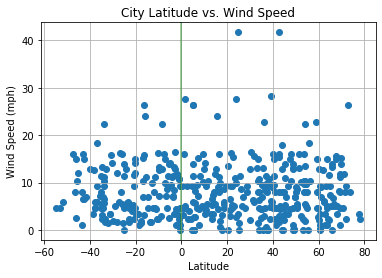

In [49]:
#Plot latitude vs wind speed
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'])
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.axvline(x=0,c="g",alpha=0.5)

#save as png
plt.savefig('lat_wind.png', bbox_inches='tight')